In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1 = open("/data1/YHC/QiTan_data/ara/Sturgeon/filtered_pass.fastq")
f2 = open("/data1/YHC/QiTan_data/ara/Sturgeon/filtered_fail.fastq")
cnt = 0
quals = []
for line in f1:
    # print(line)
    # break
    cnt += 1
    if cnt % 4 == 1:
        quals.append(int(line[43:46]))
for line in f2:
    # print(line)
    # break
    cnt += 1
    if cnt % 4 == 1:
        quals.append(int(line[43:45]))

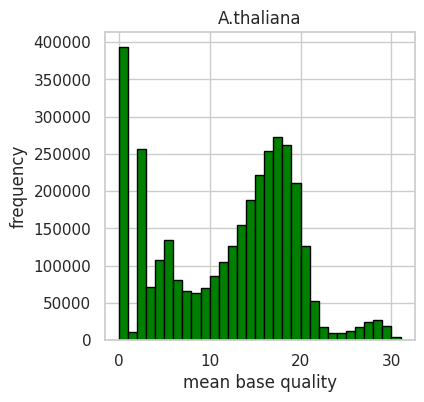

In [98]:
quals.sort()
plt.figure(figsize=(4,4))
plt.hist(quals, bins=max(quals) - min(quals), color="green", edgecolor='black') 
plt.title("A.thaliana")
plt.ylabel("frequency")
plt.xlabel("mean base quality")
plt.show()

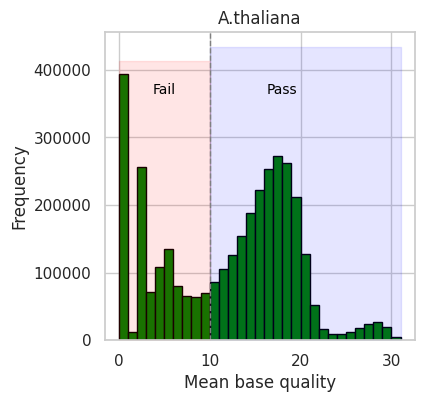

In [100]:
# 绘制直方图
plt.figure(figsize=(4, 4))
plt.hist(quals, bins=max(quals) - min(quals), color="green", edgecolor='black')
plt.title("A.thaliana")
plt.ylabel("Frequency")
plt.xlabel("Mean base quality")

# 添加竖直虚线
threshold = 10
plt.axvline(threshold, color='grey', linestyle='--', linewidth=1)

# 添加填充颜色
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(quals), x2=threshold, color='red', alpha=0.1, label='Fail')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=threshold, x2=max(quals), color='blue', alpha=0.1, label='Pass')

# 添加标记文本
plt.text(threshold - 5, plt.ylim()[1] * 0.8, 'Fail', color='black', ha='center', fontsize=10)
plt.text(threshold + 8, plt.ylim()[1] * 0.8, 'Pass', color='black', ha='center', fontsize=10)

# 显示图形
plt.show()

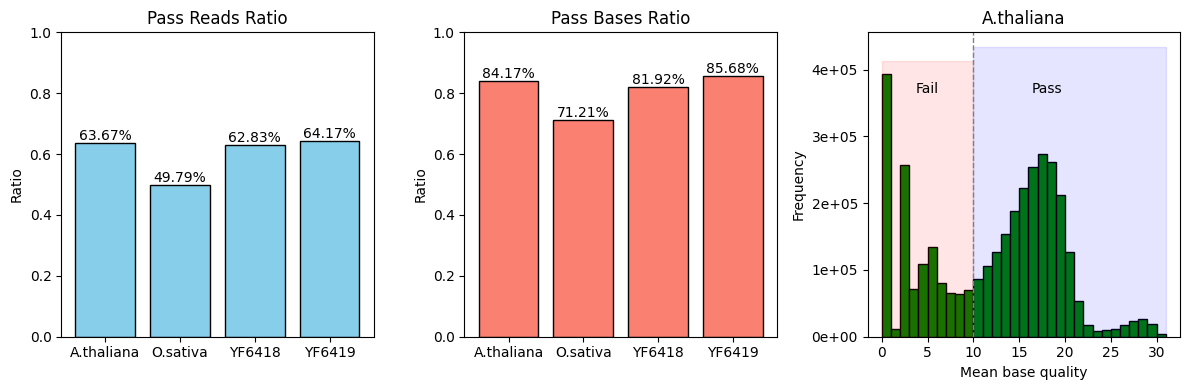

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 创建数据
data = {
    'Dataset': ['A.thaliana', 'O.sativa', 'YF6418', 'YF6419'],
    'Pass Reads Ratio': [0.636714785, 0.497911907, 0.628269463, 0.64171686],
    'Pass Bases Ratio': [0.841715457, 0.712115, 0.819213209, 0.856816784]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置图像尺寸
plt.figure(figsize=(12, 4))

# 绘制 "Pass Reads Ratio" 柱状图
plt.subplot(1, 3, 1)  # 1行2列的第1个图
bars = plt.bar(df['Dataset'], df['Pass Reads Ratio'], color='skyblue', edgecolor='black')
plt.title('Pass Reads Ratio')
plt.ylabel('Ratio')
plt.ylim(0, 1)  # 设置y轴为百分比范围

# 在柱状图顶端添加数值标签
for bar, value in zip(bars, df['Pass Reads Ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2%}', 
             ha='center', va='bottom', fontsize=10)

# 绘制 "Pass Bases Ratio" 柱状图
plt.subplot(1, 3, 2)  # 1行2列的第2个图
bars = plt.bar(df['Dataset'], df['Pass Bases Ratio'], color='salmon', edgecolor='black')
plt.ylabel('Ratio')
plt.title('Pass Bases Ratio')
plt.ylim(0, 1)  # 设置y轴为百分比范围

# 在柱状图顶端添加数值标签
for bar, value in zip(bars, df['Pass Bases Ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2%}', 
             ha='center', va='bottom', fontsize=10)

plt.subplot(1, 3, 3)
plt.hist(quals, bins=max(quals) - min(quals), color="green", edgecolor='black')
plt.title("A.thaliana")
plt.ylabel("Frequency")
plt.xlabel("Mean base quality")

# 添加竖直虚线

threshold = 10
plt.axvline(threshold, color='grey', linestyle='--', linewidth=1)

# 添加填充颜色
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(quals), x2=threshold, color='red', alpha=0.1, label='Fail')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=threshold, x2=max(quals), color='blue', alpha=0.1, label='Pass')

# 添加标记文本
plt.text(threshold - 5, plt.ylim()[1] * 0.8, 'Fail', color='black', ha='center', fontsize=10)
plt.text(threshold + 8, plt.ylim()[1] * 0.8, 'Pass', color='black', ha='center', fontsize=10)

# 使用 FuncFormatter 将纵轴设置为科学计数法
formatter = ticker.FuncFormatter(lambda x, _: f'{x:.0e}')
plt.gca().yaxis.set_major_formatter(formatter)

# 显示图像
plt.tight_layout()  # 自动调整布局
plt.savefig("fig3_1", dpi=400, bbox_inches="tight")
plt.show()


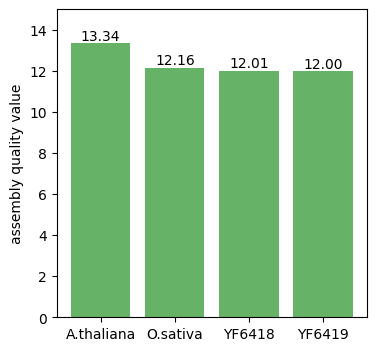

In [14]:
# 数据
categories = ['A.thaliana', 'O.sativa', 'YF6418', 'YF6419']
values = [13.3361, 12.1638, 12.0096, 11.9996]

# 设置图形风格
# sns.set(style="whitegrid")

# 创建绘图
plt.figure(figsize=(4, 4))  # 调整图像尺寸
bars = plt.bar(categories, values, color='green', alpha=0.6)  # 设置每个柱的颜色

# 设置百分比标签
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom', fontsize=10)

# 添加标签和标题
plt.ylabel('assembly quality value')
# plt.title("assembly quality value")
# plt.grid()
plt.ylim(0, 15)  # 设置y轴范围以容纳百分比
plt.savefig("fig3_2", dpi=400, bbox_inches="tight")
plt.show()

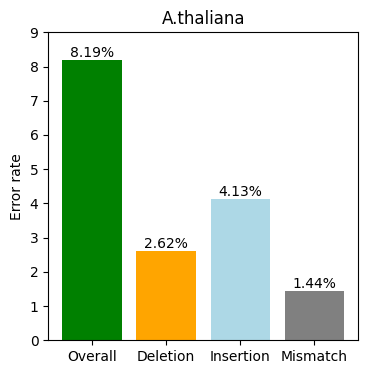

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
categories = ['Overall', 'Deletion', 'Insertion', 'Mismatch']
values = [8.19, 2.62, 4.13, 1.44]

# 设置图形风格
# sns.set(style="whitegrid")

# 创建绘图
plt.figure(figsize=(4, 4))  # 调整图像尺寸
bars = plt.bar(categories, values, color=['green', 'orange', 'lightblue', 'grey'])  # 设置每个柱的颜色

# 设置百分比标签
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             ha='center', va='bottom', fontsize=10)

# 添加标签和标题
plt.ylabel('Error rate')
plt.title("A.thaliana")
plt.ylim(0, 9.0)  # 设置y轴范围以容纳百分比
plt.savefig("fig3_3", dpi=400, bbox_inches="tight")
plt.show()

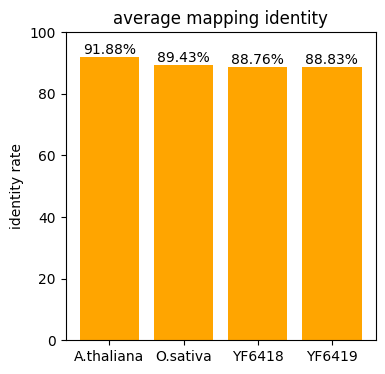

In [28]:
# 数据
categories = ['A.thaliana', 'O.sativa', 'YF6418', 'YF6419']
values = [91.8756014463778, 89.432697769823, 88.7613674916892, 88.83276535034]

# 设置图形风格
# sns.set(style="whitegrid")

# 创建绘图
plt.figure(figsize=(4, 4))  # 调整图像尺寸
bars = plt.bar(categories, values, color='orange', alpha=1)  # 设置每个柱的颜色

# 设置百分比标签
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             ha='center', va='bottom', fontsize=10)

# 添加标签和标题
plt.ylabel('identity rate')
plt.title("average mapping identity")
plt.ylim(0, 100.0)  # 设置y轴范围以容纳百分比
plt.savefig("fig3_4", dpi=400, bbox_inches="tight")
plt.show()

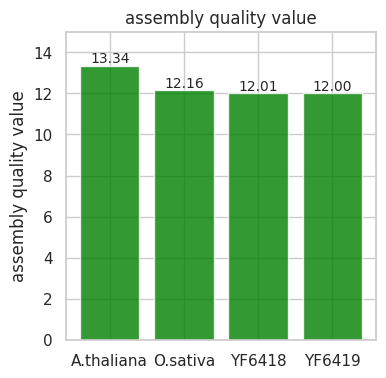

In [127]:
7836976 / 4

1959244.0